In [1]:
# Importation de nos packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, chi2_contingency
import itertools

In [3]:
# Importation des nos fichiers
eval_df = pd.read_csv('../fichiers/extrait_eval.csv')
sirh_df = pd.read_csv('../fichiers/extrait_sirh.csv')
sondage_df = pd.read_csv('../fichiers/extrait_sondage.csv')

dfs = {
    'eval' : eval_df,
    'sirh' : sirh_df,
    'sondage' : sondage_df
}

In [5]:
for name, df in dfs.items():
    print('*******', name, '*******')
    print(df.info(), '\n')
    print("*"*100)

******* eval *******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), ob

* **OBSERVATIONS :**
    - **EVAL :** 10 variables et 1470 lignes. Pas de valeurs manquantes
        - Types de variables : 7 entiers et 3 chaine de caractère
    - **SIRH :** 12 variables et 1470 lignes. Pas de valeurs manquantes
        - Types de variables : 8 entiers et 4 chaine de caractère
    - **SONDAGE :** 12 variables et 1470 lignes. Pas de valeurs manquantes
        - Types de variables : 8 entiers et 4 chaine de caractère
______
* **Tous nos fichiers ont le même nombre d'entrée donc l'entreprise en question a eu probablement 1470 employés**

In [8]:
dfs['sirh'].head()

id_employee  age genre  revenu_mensuel statut_marital departement  \
0            1   41     F            5993    Célibataire  Commercial   
1            2   49     M            5130       Marié(e)  Consulting   
2            4   37     M            2090    Célibataire  Consulting   
3            5   33     F            2909       Marié(e)  Consulting   
4            7   27     M            3468       Marié(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   nombre_heures_travailless  annee_experience_totale  \
0                         80                        8   
1                         80                       10   
2                         80                        7   
3                         80                        8   
4                         80                        6   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  
0                         6                            4  
1                        10                            7  
2                         0                            0  
3                         8                            7  
4                         2                            2

In [10]:
dfs['sondage'].head()

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   
1                   Non                         1                      3   
2                   Oui                         0                      3   
3                   Non                         0                      3   
4                   Non                         1                      3   

   nombre_employee_sous_responsabilite  code_sondage  \
0                                    1             1   
1                                    1             2   
2                                    1             4   
3                                    1             5   
4                                    1             7   

   distance_domicile_travail  niveau_education            domaine_etude  \
0                          1                 2            Infra & Cloud   
1                          8                 1            Infra & Cloud   
2                          2                 2                    Autre   
3                          3                 4            Infra & Cloud   
4                          2                 1  Transformation Digitale   

  ayant_enfants frequence_deplacement  annees_depuis_la_derniere_promotion  \
0             Y           Occasionnel                                    0   
1             Y              Frequent                                    1   
2             Y           Occasionnel                                    0   
3             Y              Frequent                                    3   
4             Y           Occasionnel                                    2   

   annes_sous_responsable_actuel  
0                              5  
1                              7  
2                              0  
3                              0  
4                              2

In [12]:
dfs['eval'].head()

satisfaction_employee_environnement  note_evaluation_precedente  \
0                                    2                           3   
1                                    3                           2   
2                                    4                           2   
3                                    4                           3   
4                                    1                           3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   
1                          2                                     2   
2                          1                                     3   
3                          1                                     3   
4                          1                                     2   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   
1                             4                                          3   
2                             2                                          3   
3                             3                                          3   
4                             4                                          3   

  eval_number  note_evaluation_actuelle heure_supplementaires  \
0         E_1                         3                   Oui   
1         E_2                         4                   Non   
2         E_4                         3                   Oui   
3         E_5                         3                   Oui   
4         E_7                         3                   Non   

  augementation_salaire_precedente  
0                             11 %  
1                             23 %  
2                             15 %  
3                             11 %  
4                             12 %

## Identifions et nettoyons les colonnes qui correspondent à des informations quantitatives ou qualitatives.
- Repérons les valeurs manquantes (NaN) ou erronées, et décider comment les gérer (remplir, supprimer…).
- Uniformisons les formats : par exemple, si nous avons "Homme", "homme" et "HOMME", les regrouper.
- Convertissons les types si besoin : transformer une colonne texte en numérique ou en catégorie selon son usage.
- Supprimons les doublons ou les incohérences.
______

## **1. SIRH**

* **Les varibles inutiles :**
    - `nombre_heures_travailless` : nous observons qu'elle ne varie pas du tout (std = 0.0)
* **Les variables sur les quelles se pencher:**
    - `revenu_mensuel` (le max à 19 999 € est très élevé comparé à la médiane de 4 919 €) et nous observons des personnes qui touche moins que le smic (1009 €)
___

In [15]:
def etude_var_cat(df):
    for col in df.select_dtypes(exclude=[np.number]).columns:
        print('******', col, '*****')
        print(f"{df[col].value_counts()}")
        print('*'*80)


def etude_var_num(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        print('******', col, '*****')
        print(f"{df[col].describe()}")
        sns.boxplot(df[col])
        plt.title(f"Etude la distribution de {col}")
        plt.show()
        print('*'*100)

In [17]:
etude_var_cat(dfs['sirh'])

****** genre *****
genre
M    882
F    588
Name: count, dtype: int64
********************************************************************************
****** statut_marital *****
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64
********************************************************************************
****** departement *****
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64
********************************************************************************
****** poste *****
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64
********************************************************************************


****** id_employee *****
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: id_employee, dtype: float64


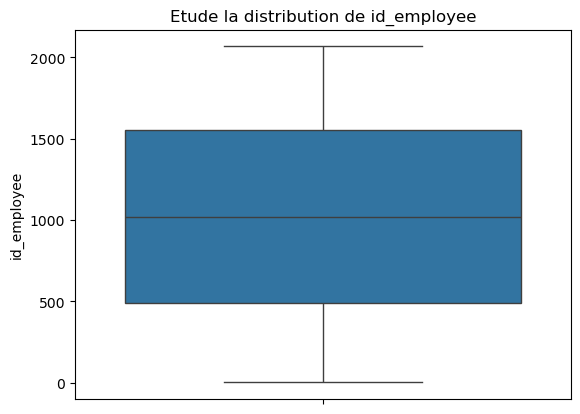

****************************************************************************************************
****** age *****
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64


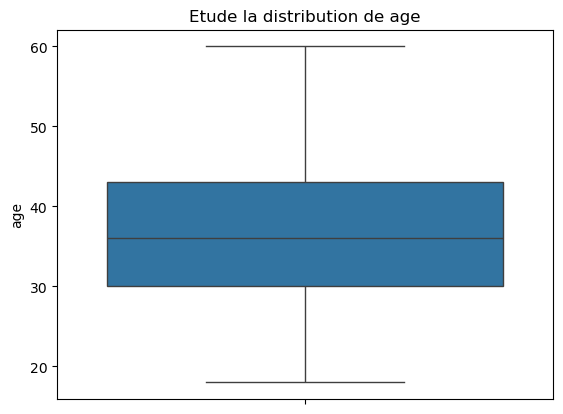

****************************************************************************************************
****** revenu_mensuel *****
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: revenu_mensuel, dtype: float64


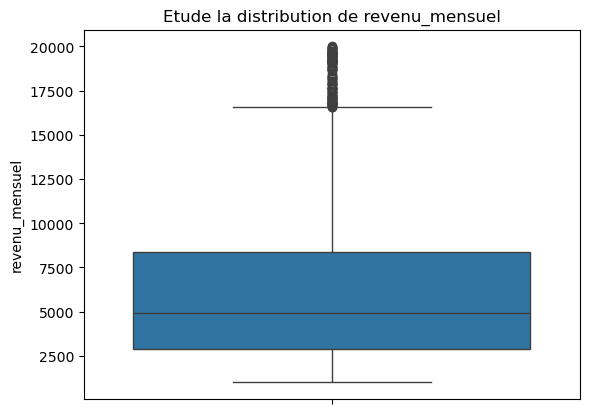

****************************************************************************************************
****** nombre_experiences_precedentes *****
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: nombre_experiences_precedentes, dtype: float64


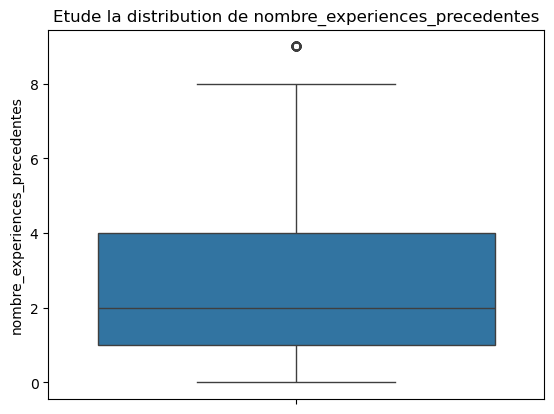

****************************************************************************************************
****** nombre_heures_travailless *****
count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: nombre_heures_travailless, dtype: float64


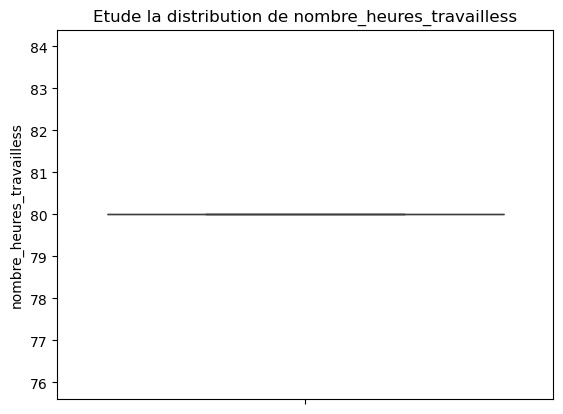

****************************************************************************************************
****** annee_experience_totale *****
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: annee_experience_totale, dtype: float64


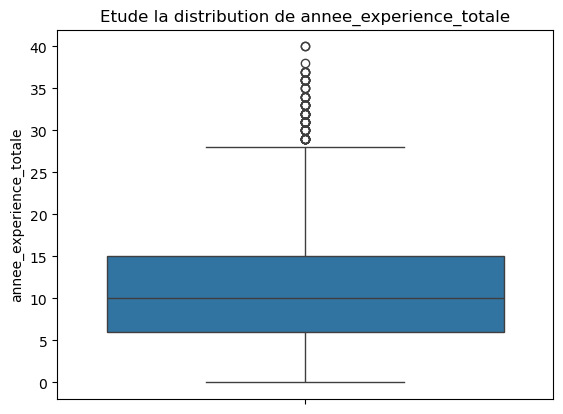

****************************************************************************************************
****** annees_dans_l_entreprise *****
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: annees_dans_l_entreprise, dtype: float64


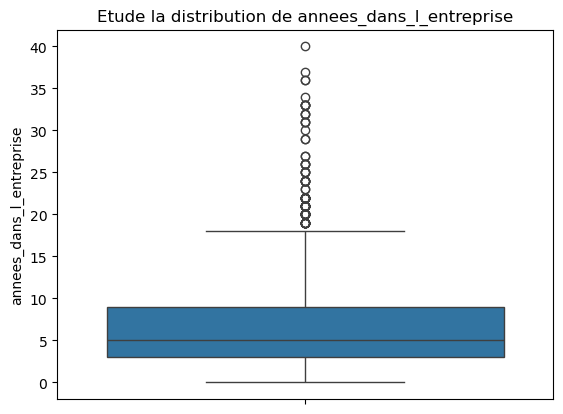

****************************************************************************************************
****** annees_dans_le_poste_actuel *****
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: annees_dans_le_poste_actuel, dtype: float64


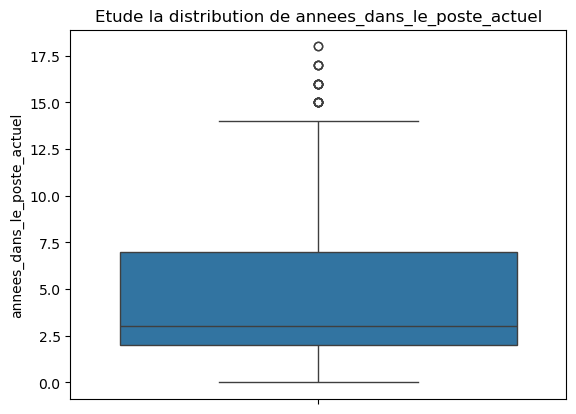

****************************************************************************************************


In [19]:
etude_var_num(dfs['sirh'])

In [21]:
# Detection de doublons
dfs['sirh'].duplicated(subset='id_employee').sum()

0

### Etudes de quelques variables et des rélations 
- Salaire vs. niveau expérience totale.
- Salaire vs. niveau d'ancienneté
- La rélation entre age et expérience totale

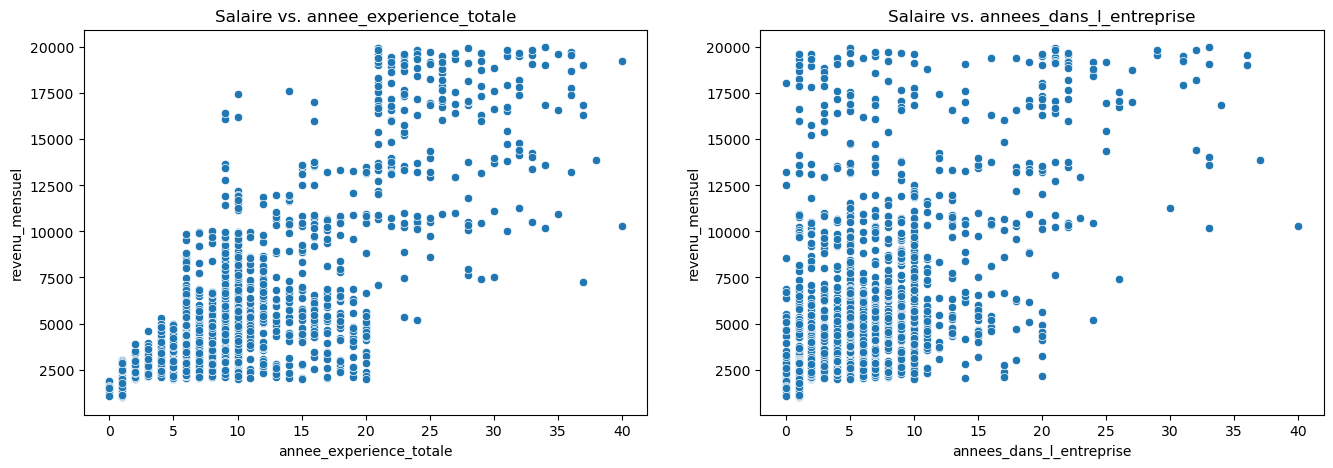

In [24]:
# Salaire vs. niveau expérience totale.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.scatterplot(x=dfs['sirh']['annee_experience_totale'], y=dfs['sirh']["revenu_mensuel"], ax=axes[0])
axes[0].set_title("Salaire vs. annee_experience_totale")
sns.scatterplot(x=dfs['sirh']['annees_dans_l_entreprise'], y=dfs['sirh']["revenu_mensuel"], ax=axes[1])
axes[1].set_title("Salaire vs. annees_dans_l_entreprise")
plt.show()

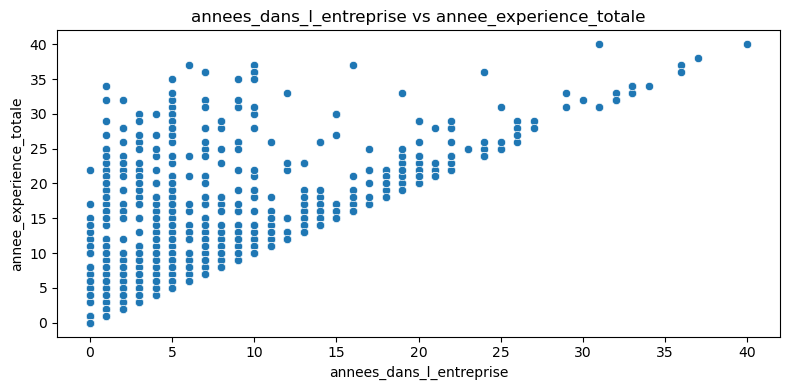

In [26]:
# La corrélation entre ancienneté et annee_experience_totale (40 ans d’expérience pour 40 ans dans l’entreprise, par exemple, serait louche).
plt.figure(figsize=(8, 4))
sns.scatterplot(x=dfs['sirh']["annees_dans_l_entreprise"], y=dfs['sirh']["annee_experience_totale"])
plt.title('annees_dans_l_entreprise vs annee_experience_totale')
plt.tight_layout()


- nous observons que les points bleus (cohérents) suivent une tendance diagonale naturelle : plus d’ancienneté -> plus d’expérience totale (cohérence logique.)

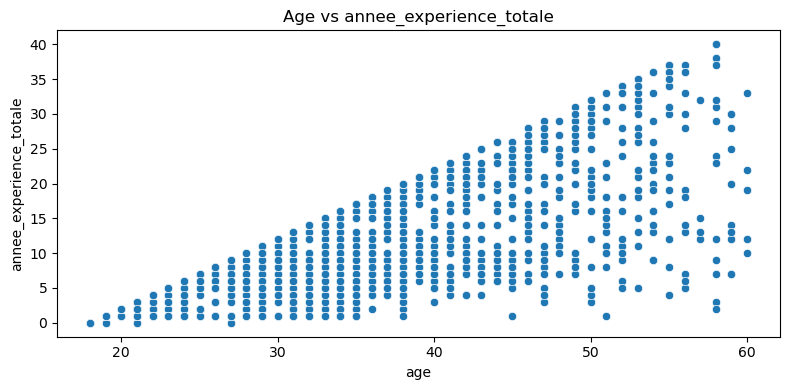

In [29]:
# La rélation entre age et expérience totale
plt.figure(figsize=(8, 4))
sns.scatterplot(x=dfs['sirh']["age"], y=dfs['sirh']["annee_experience_totale"])
plt.title('Age vs annee_experience_totale')
plt.tight_layout()
plt.show()

- les points bleus indiquent que, globalement, plus on vieillit, plus l’expérience accumulée augmente — logique. Et nous observons d'autres plus âgés avec peu d'expérience — peut être une reconversion tardive.

## **2. SONDAGE**
______
- **OBSERVATIONs :**
    - **Variables inutiles :**
        - `ayant_enfants` : présence d'une seule catégories dans les 1470 (apporte aucune information)
        - `nombre_employee_sous_responsabilite` : std = 0.0
        - `code_sondage` : je pense qu'elle ressemble fortement à un identifiant -> peut-être utilisé pour la jointure, mais inutile pour le ML.
    - `a_quitte_l_entreprise` : probablement notre variables cible (environ 16 % ont quitté (237/1470))

In [33]:
etude_var_cat(dfs['sondage'])

****** a_quitte_l_entreprise *****
a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64
********************************************************************************
****** domaine_etude *****
domaine_etude
Infra & Cloud              606
Transformation Digitale    464
Marketing                  159
Entrepreunariat            132
Autre                       82
Ressources Humaines         27
Name: count, dtype: int64
********************************************************************************
****** ayant_enfants *****
ayant_enfants
Y    1470
Name: count, dtype: int64
********************************************************************************
****** frequence_deplacement *****
frequence_deplacement
Occasionnel    1043
Frequent        277
Aucun           150
Name: count, dtype: int64
********************************************************************************


****** nombre_participation_pee *****
count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: nombre_participation_pee, dtype: float64


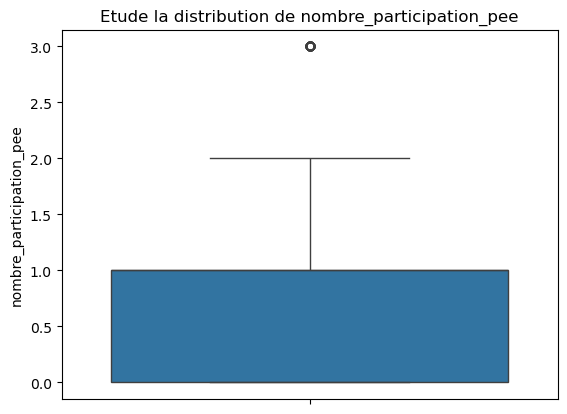

****************************************************************************************************
****** nb_formations_suivies *****
count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: nb_formations_suivies, dtype: float64


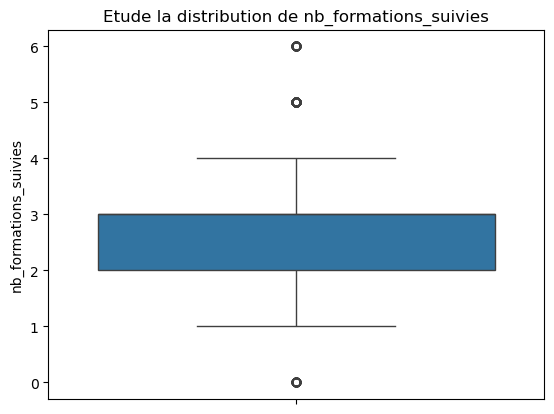

****************************************************************************************************
****** nombre_employee_sous_responsabilite *****
count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: nombre_employee_sous_responsabilite, dtype: float64


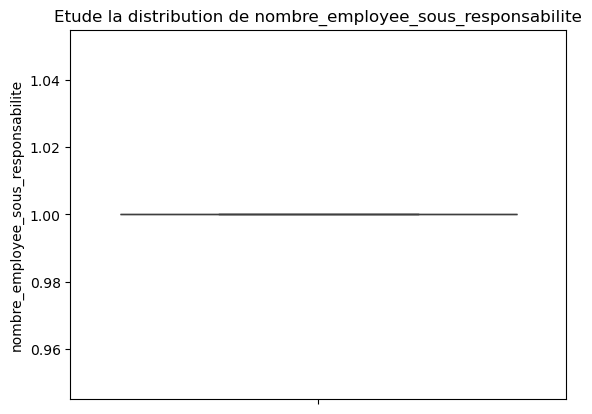

****************************************************************************************************
****** code_sondage *****
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: code_sondage, dtype: float64


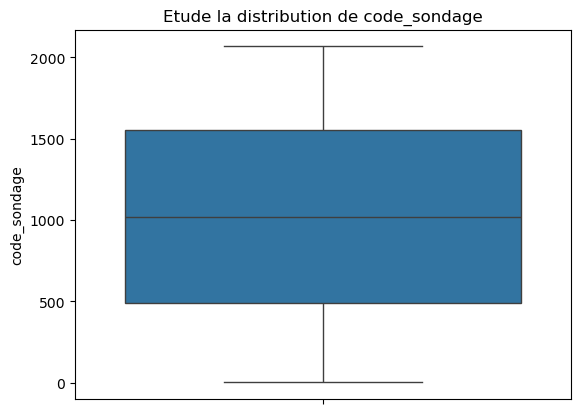

****************************************************************************************************
****** distance_domicile_travail *****
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_domicile_travail, dtype: float64


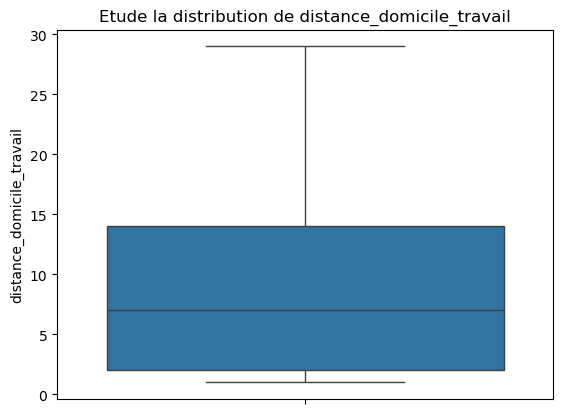

****************************************************************************************************
****** niveau_education *****
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: niveau_education, dtype: float64


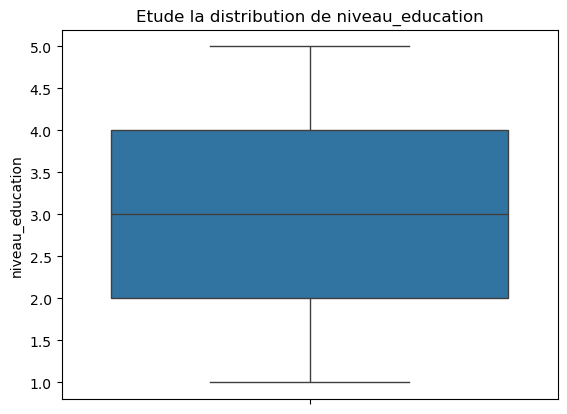

****************************************************************************************************
****** annees_depuis_la_derniere_promotion *****
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: annees_depuis_la_derniere_promotion, dtype: float64


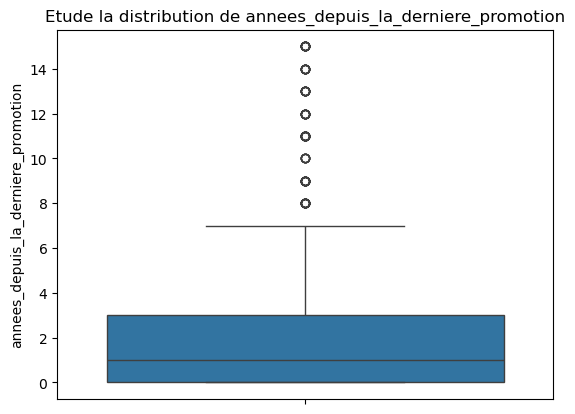

****************************************************************************************************
****** annes_sous_responsable_actuel *****
count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: annes_sous_responsable_actuel, dtype: float64


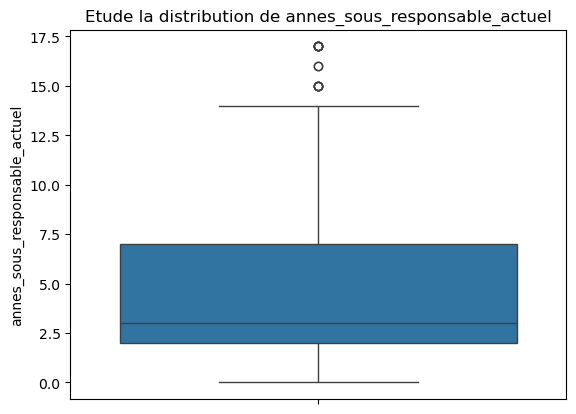

****************************************************************************************************


In [35]:
etude_var_num(dfs['sondage'])

In [37]:
# Detection de doublons
dfs['sondage'].duplicated(subset='code_sondage').sum()

0

### Etudes de quelques variables et des rélations 
- `frequence_deplacement` : Nous pouvons voir si la mobilité influence la rétention.
- `distance_domicile_travail` : si aussi si le comfort influence les démissions.

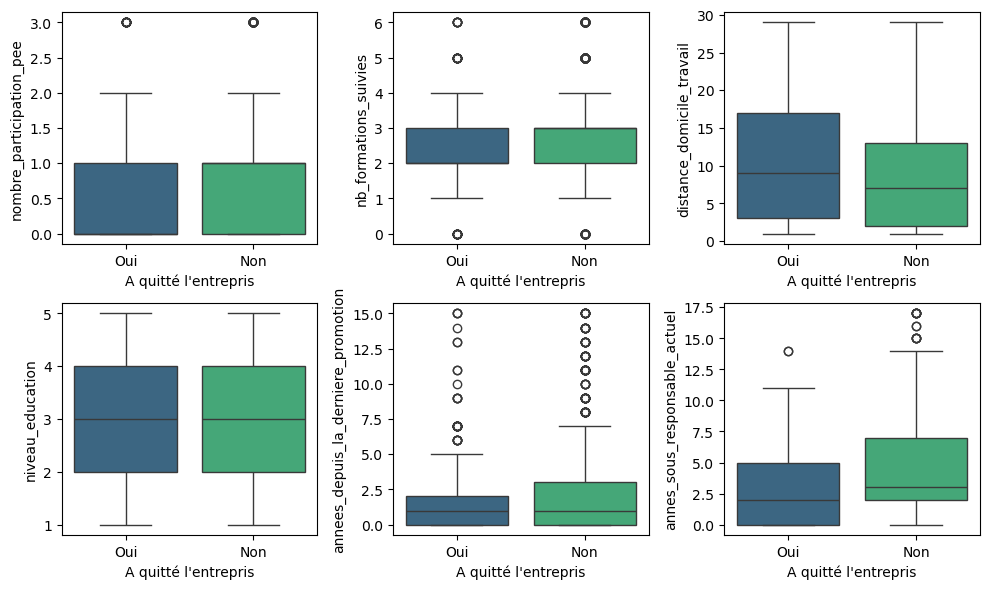

In [40]:
# Variables numérique vs. cible 
num_var = [col for col in dfs['sondage'].select_dtypes(include=[np.number]).columns 
           if col not in ['nombre_employee_sous_responsabilite', 'code_sondage']]# car elles n'apportent aucune information utile

# Création d'une grille de subplots (je choisi 3 colonnes par ligne)
n_cols = 3
n_rows = (len(num_var) + n_cols - 1) // n_cols  #

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()  # Aplatir pour faciliter l'itération

for i, col in enumerate(num_var):
    sns.boxplot(x='a_quitte_l_entreprise', y=col, data=dfs['sondage'], ax=axes[i], hue = 'a_quitte_l_entreprise', palette='viridis')
    axes[i].set_xlabel("A quitté l'entrepris")
    axes[i].set_ylabel(col)

# Cachons les axes vides s'il y en a
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

- `distance_domicile_travail` : les employés ayant quitté l’entreprise semblent avoir une distance légèrement plus élevée, en moyenne que ceux qui sont restés.
- `annes_sous_responsable_actuel` : Les employés restés ont souvent passé plus de temps sous leur manager actuel -> peut-être un lien de confiance ou de stabilité managériale.

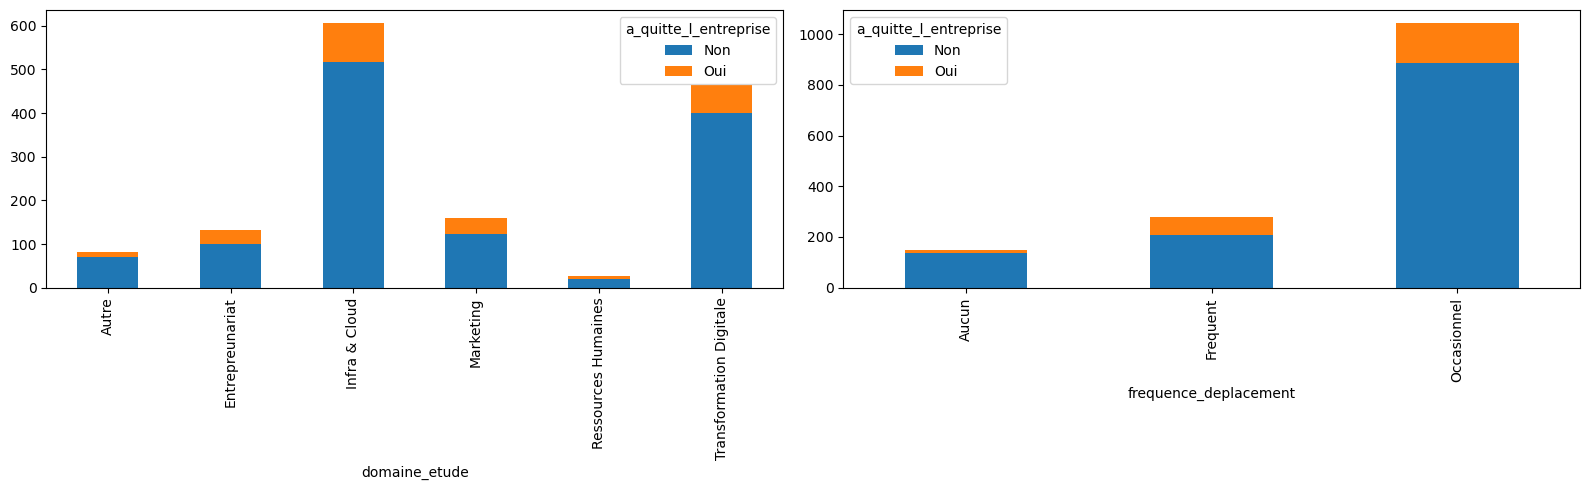

In [43]:
# Variables catégorielles vs. cible a supprimer <<ayant_enfants>>
cat_var = [col for col in dfs['sondage'].select_dtypes(exclude=[np.number]).columns
           if col not in ['ayant_enfants', 'a_quitte_l_entreprise']]# comme dit plus haut a supprimer

n_cols = 2
n_rows = (len(cat_var) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_var):
    pd.crosstab(dfs['sondage'][col], dfs['sondage']["a_quitte_l_entreprise"]).plot(kind="bar", stacked=True, ax=axes[i]) # supperposons les bar avec stacked
    axes[i].set_xlabel(col)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

* **domaine_etude :**

    - Les domaines Infra & Cloud et Transformation Digitale ont le plus de répondants, mais montrent aussi une proportion non négligeable de départs.
    - Les domaines Entrepreunariat et marketing, bien que moins représenté en volume, semble avoir une proportion plus élevée de départs après les deux prmiers -> cela pourrait refléter un esprit plus autonome ou une appétence à quitter pour créer.
    - Le domaines Ressources Humaines et Autre montrent peu de départs -> signe possible de fidélité.
______
* **frequence_deplacement :**
* 
    - Les salariés ayant une fréquence de déplacement "Ocassionel" affichent visiblement un taux de départ plus élevé (même si il sont les plus répresentés)
    - Ceux qui ne se déplacent jamais (Aucun) semblent plus fidèles ➤ peut être lié au confort ou à des missions sédentaires.
_______

## **3. EVAL**
______
- **OBSERVATIONs :**
    - **Variables inutiles :**
        - `eval_number` : ça ressemble à un identifiant -> on l’élimine pour le modèle.
    - `augementation_salaire_precedente` : ressemble a une variable numérique transformer en catégoielle
    - j'observe aussi que toutes les notes vont de 1 à 4

In [47]:
etude_var_cat(dfs['eval'])

****** eval_number *****
eval_number
E_1       1
E_1391    1
E_1389    1
E_1387    1
E_1383    1
         ..
E_659     1
E_657     1
E_656     1
E_655     1
E_2068    1
Name: count, Length: 1470, dtype: int64
********************************************************************************
****** heure_supplementaires *****
heure_supplementaires
Non    1054
Oui     416
Name: count, dtype: int64
********************************************************************************
****** augementation_salaire_precedente *****
augementation_salaire_precedente
11 %    210
13 %    209
14 %    201
12 %    198
15 %    101
18 %     89
17 %     82
16 %     78
19 %     76
22 %     56
20 %     55
21 %     48
23 %     28
24 %     21
25 %     18
Name: count, dtype: int64
********************************************************************************


****** satisfaction_employee_environnement *****
count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_environnement, dtype: float64


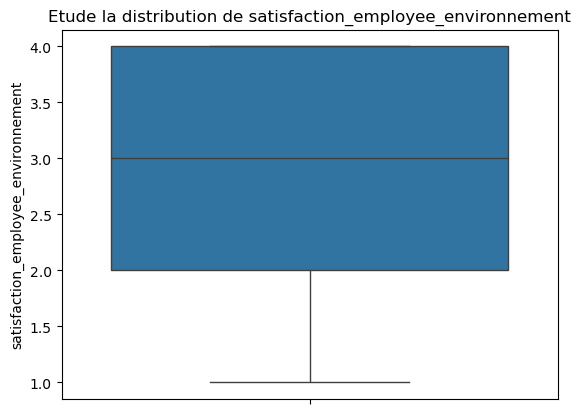

****************************************************************************************************
****** note_evaluation_precedente *****
count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_precedente, dtype: float64


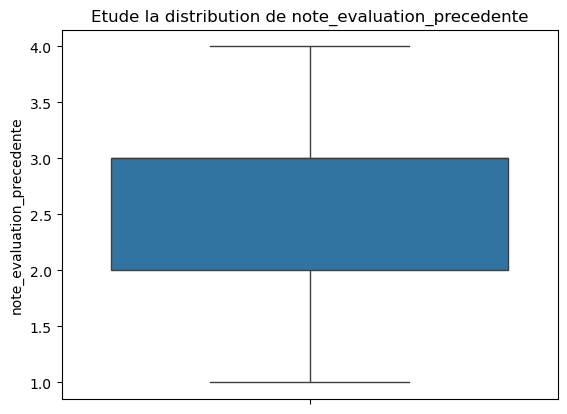

****************************************************************************************************
****** niveau_hierarchique_poste *****
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: niveau_hierarchique_poste, dtype: float64


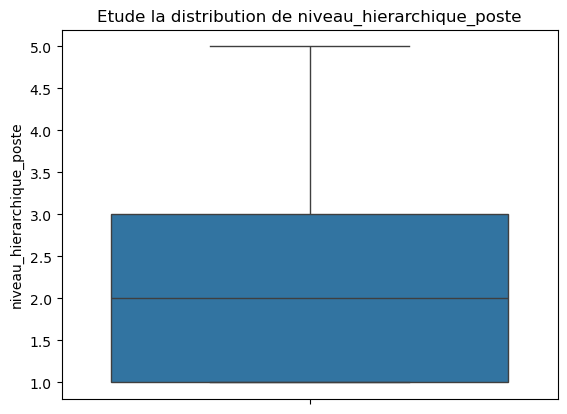

****************************************************************************************************
****** satisfaction_employee_nature_travail *****
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_nature_travail, dtype: float64


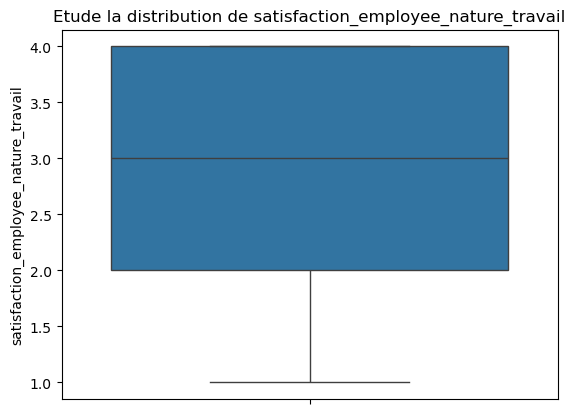

****************************************************************************************************
****** satisfaction_employee_equipe *****
count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_equipe, dtype: float64


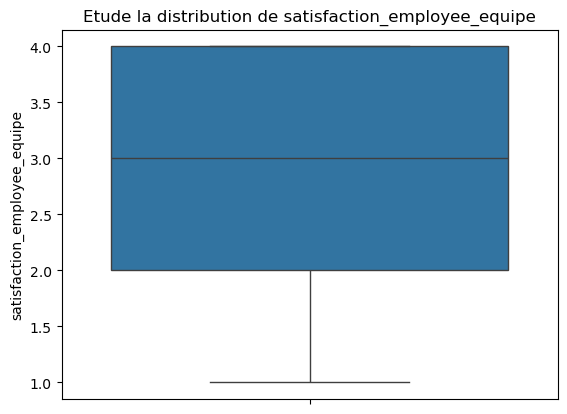

****************************************************************************************************
****** satisfaction_employee_equilibre_pro_perso *****
count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: satisfaction_employee_equilibre_pro_perso, dtype: float64


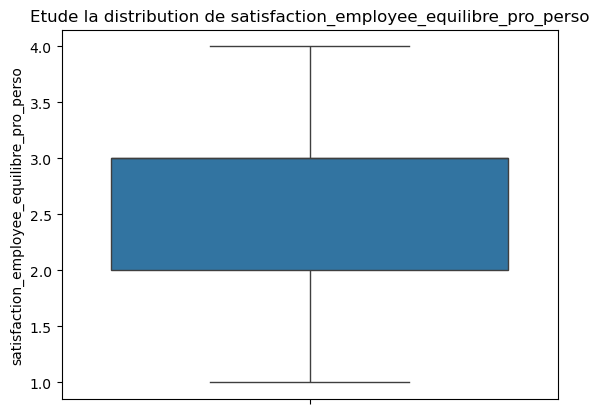

****************************************************************************************************
****** note_evaluation_actuelle *****
count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_actuelle, dtype: float64


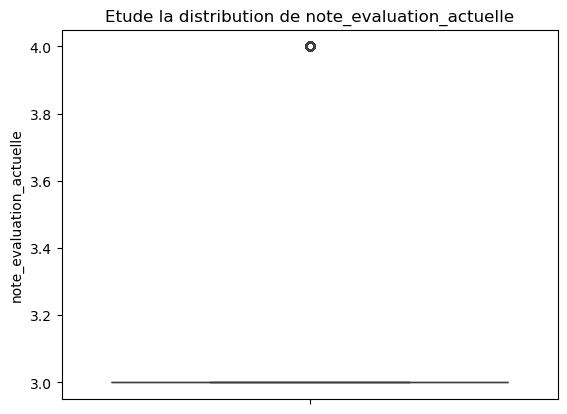

****************************************************************************************************


In [49]:
etude_var_num(dfs['eval'])

## FUSION DE NOS DONNEES

- D'après l'EDA qu'on vient de faire les colonnes permettant de réaliser des jointures entre les 3 fichiers sont:
    - **SONDAGE :** la colonne `code_sondage` (min = 1, max=2068)
    - **SIRH :** la colonne `id_employee` (min=1, max=2068)
    - **EVAL :** la colonne `eval_num` son contenu est de la forme (**E_idUnique**), donc cette variable a besoin d'une double transformation (suppression du prefixe **E** et conversion en entier)
______
- TYPE DE FUSION :
    - Comme notre cible se trouve dans `Sondage`,il faut qu'on fasse un join en faveur de ce fichier (car nous voulons pas de donnée sans cible pour le ML.)

In [52]:
print(dfs['eval']['eval_number'].nunique())

1470


In [54]:
# Supprimons le prefixe E de la variable eval_number
dfs['eval']['eval_num_int'] = dfs['eval']['eval_number'] \
    .apply(lambda x: int(x.split('_')[1]))
dfs['eval']['eval_num_int'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: eval_num_int, dtype: float64

In [56]:
# Fusion de nos fichiers
fusion = dfs['sondage'].merge(
    dfs['eval'],
    left_on='code_sondage',
    right_on='eval_num_int',
    how='left'
)
fusion.head(1)

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   

   nombre_employee_sous_responsabilite  code_sondage  \
0                                    1             1   

   distance_domicile_travail  niveau_education  domaine_etude ayant_enfants  \
0                          1                 2  Infra & Cloud             Y   

  frequence_deplacement  ...  note_evaluation_precedente  \
0           Occasionnel  ...                           3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   

   eval_number  note_evaluation_actuelle  heure_supplementaires  \
0          E_1                         3                    Oui   

  augementation_salaire_precedente  eval_num_int  
0                             11 %             1  

[1 rows x 23 columns]

In [58]:
fusion_df = fusion.merge(
    dfs['sirh'],
    left_on='code_sondage',
    right_on='id_employee',
    how='left'
)
fusion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   a_quitte_l_entreprise                      1470 non-null   object
 1   nombre_participation_pee                   1470 non-null   int64 
 2   nb_formations_suivies                      1470 non-null   int64 
 3   nombre_employee_sous_responsabilite        1470 non-null   int64 
 4   code_sondage                               1470 non-null   int64 
 5   distance_domicile_travail                  1470 non-null   int64 
 6   niveau_education                           1470 non-null   int64 
 7   domaine_etude                              1470 non-null   object
 8   ayant_enfants                              1470 non-null   object
 9   frequence_deplacement                      1470 non-null   object
 10  annees_depuis_la_derniere_promotion 

In [60]:
var_todrop = ['ayant_enfants', 'nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'code_sondage',
              'eval_number', 'eval_num_int', 'id_employee'
             ]
fusion_df.drop(columns=var_todrop, inplace=True)

In [62]:
fusion_df.head()

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   
1                   Non                         1                      3   
2                   Oui                         0                      3   
3                   Non                         0                      3   
4                   Non                         1                      3   

   distance_domicile_travail  niveau_education            domaine_etude  \
0                          1                 2            Infra & Cloud   
1                          8                 1            Infra & Cloud   
2                          2                 2                    Autre   
3                          3                 4            Infra & Cloud   
4                          2                 1  Transformation Digitale   

  frequence_deplacement  annees_depuis_la_derniere_promotion  \
0           Occasionnel                                    0   
1              Frequent                                    1   
2           Occasionnel                                    0   
3              Frequent                                    3   
4           Occasionnel                                    2   

   annes_sous_responsable_actuel  satisfaction_employee_environnement  ...  \
0                              5                                    2  ...   
1                              7                                    3  ...   
2                              0                                    4  ...   
3                              0                                    4  ...   
4                              2                                    1  ...   

   age  genre  revenu_mensuel  statut_marital  departement  \
0   41      F            5993     Célibataire   Commercial   
1   49      M            5130        Marié(e)   Consulting   
2   37      M            2090     Célibataire   Consulting   
3   33      F            2909        Marié(e)   Consulting   
4   27      M            3468        Marié(e)   Consulting   

                    poste nombre_experiences_precedentes  \
0        Cadre Commercial                              8   
1  Assistant de Direction                              1   
2              Consultant                              6   
3  Assistant de Direction                              1   
4              Consultant                              9   

  annee_experience_totale  annees_dans_l_entreprise  \
0                       8                         6   
1                      10                        10   
2                       7                         0   
3                       8                         8   
4                       6                         2   

  annees_dans_le_poste_actuel  
0                           4  
1                           7  
2                           0  
3                           7  
4                           2  

[5 rows x 28 columns]

### EDA sur la fusion (cible = `a_quitte_l_entreprise`)

In [65]:
# comme identifié plus haut la var augementation_salaire_precedente semble très numérique
fusion_df['%_augementation_salaire_precedent'] = fusion_df['augementation_salaire_precedente'] \
    .apply(lambda x: int(x.split(' ')[0]))

fusion_df['%_augementation_salaire_precedent'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: %_augementation_salaire_precedent, dtype: float64

In [67]:
# supprimmons la colonne augementation_salaire_precedente
fusion_df.drop(columns='augementation_salaire_precedente', inplace=True)
num_vars = (fusion_df.select_dtypes(include=[np.number]).columns).tolist()
cat_vars = [i for i in fusion_df.select_dtypes(exclude=[np.number]).columns if i not in ['a_quitte_l_entreprise', 'incohérent']]
print("Nous Avons", len(num_vars), 'Variables Quantitatives et', len(cat_vars), 'Varaibles Qualitatives dans notre jeu de données')

Nous Avons 20 Variables Quantitatives et 7 Varaibles Qualitatives dans notre jeu de données


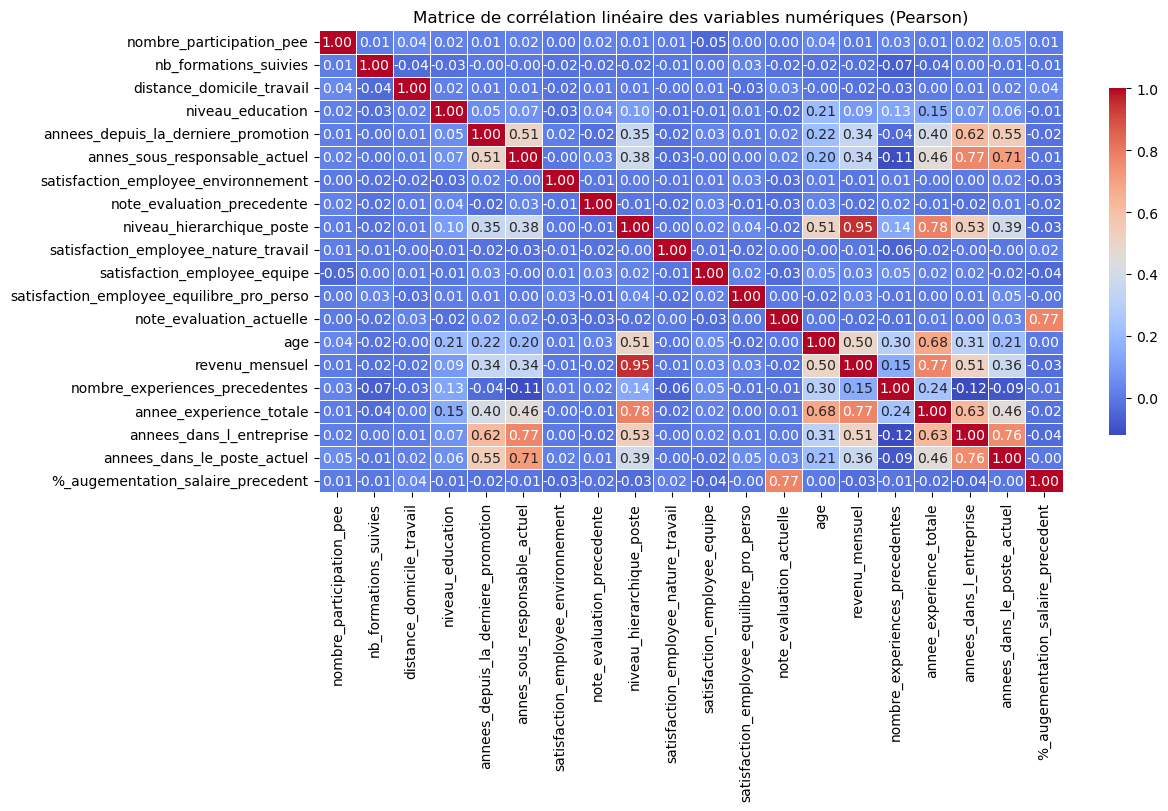

In [69]:
# Etude des rélations
corr_pearson = fusion_df[num_vars].corr(method='pearson')

# On trace les heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(corr_pearson,annot=True,fmt='.2f',linewidths=0.5,cmap='coolwarm',cbar_kws={'shrink': 0.75})
plt.title("Matrice de corrélation linéaire des variables numériques (Pearson)")
# plt.savefig('pearson.png', dpi=300, bbox_inches='tight')
plt.show()

* **INTERPRETATIONS DES CORRELATIONS LINEAIRES FORTES:**
    - `revenu_mensuel` & `niveau_hierarchique_poste` -> 0.95 donc Plus le niveau hiérarchique est élevé, plus le salaire augmente.
    - `revenu_mensuel` & `annee_experience_totale`	-> 0.77, Cohérence dans le temps.
    - `annee_experience_totale` & `niveau_hierarchique_poste` -> 0.78
    - `annes_sous_responsable_actuel` & `annees_dans_l_entreprise` -> 0.77
    - `annes_sous_responsable_actuel` & `annees_dans_le_poste_actuel` -> 0.71
    - `annees_dans_l_entreprise` & `annees_dans_le_poste_actuel` -> 0.76
    - `%_augmentation_salaire_precedent` & `note_evaluation_actuelle` -> 0.77, donc Bonne évaluation = hausse de salaire.

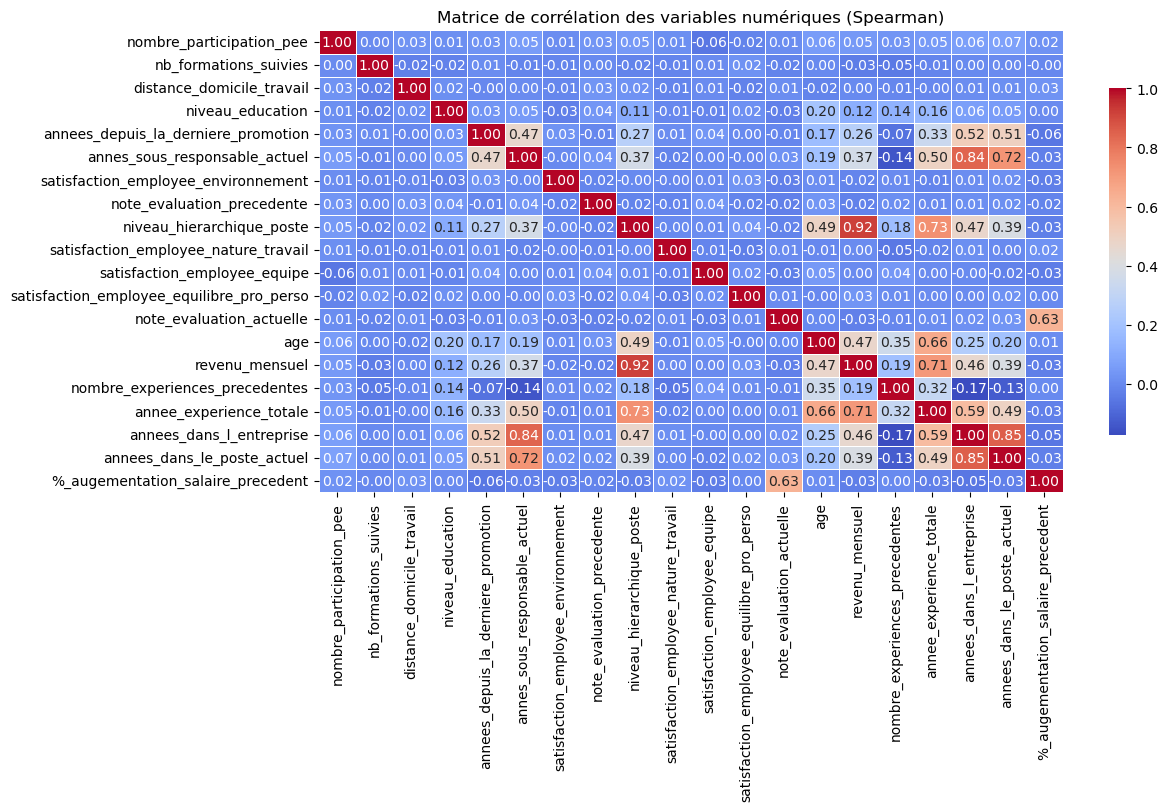

In [72]:
corr_spearman = fusion_df[num_vars].corr(method='spearman')

# On trace les heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(corr_spearman,annot=True,fmt='.2f',linewidths=0.5,cmap='coolwarm',cbar_kws={'shrink': 0.75})
plt.title("Matrice de corrélation des variables numériques (Spearman)")
plt.show()

* **INTERPRETATION :**
    - `revenu_mensuel` & `niveau_hierarchique_poste` -> 0.92, corrélation confirmé.	Hiérarchie augmente -> salaire augmente
    - `annees_dans_l_entreprise` & `annees_dans_le_poste_actuel` -> 0.85
    - `annees_dans_l_entreprise` & `annes_sous_responsable_actuel` -> 0.84
    - `annes_sous_responsable_actuel` & `annees_dans_le_poste_actuel` -> 0.72
    - `niveau_hierarchique_poste` & `annee_experience_totale` -> 0.73
    - `revenu_mensuel` & `annee_experience_totale` -> 0.71
_______

* **CONCLUSION :**
    - Nos différentes analyses nous confirme qu’il y a plusieurs groupes de variables redondantes ()
    - **Groupe 1 :** Hiérarchie, expérience, revenu
        - revenu_mensuel, niveau_hierarchique_poste, annee_experience_totale. Très corrélés entre eux dans les deux matrices.
            - À supprimer : revenu_mensuel, annee_experience_totale (redondants)
    - **Groupe 2 :** Ancienneté dans le poste / entreprise
        - annees_dans_l_entreprise, annees_dans_le_poste_actuel, annes_sous_responsable_actuel. Corrélations élevées.
            - À supprimer : annes_sous_responsable_actuel, annees_dans_le_poste_actuel
    - **Groupe 3 :** Performance & récompense
        - note_evaluation_actuelle, %_augmentation_salaire_precedent
            - À supprimer : %_augmentation_salaire_precedent (dérivée de la note)

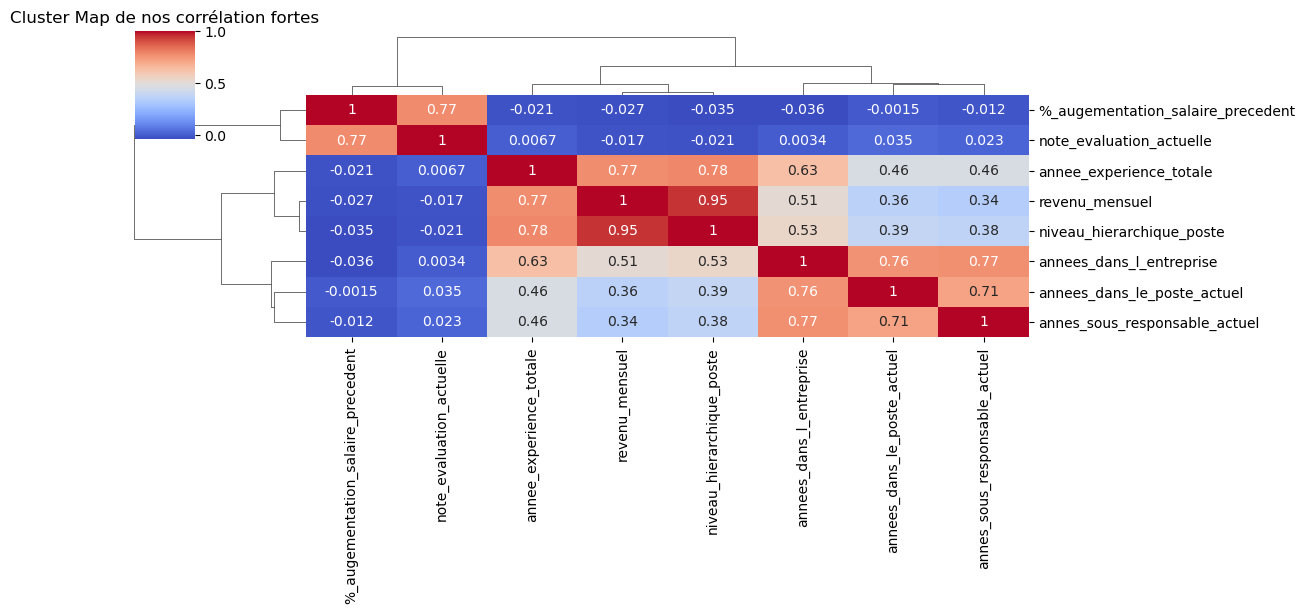

In [75]:
# Confirmation de la présence des différents groupes ( avec un clustermap par exemple)

sns.clustermap(fusion_df[ # pour avoir une figure plus propre représentons les variables avec forte corrélations
                   ['revenu_mensuel', 'niveau_hierarchique_poste', 'annee_experience_totale', 'annees_dans_le_poste_actuel',
                   'annees_dans_l_entreprise', 'annes_sous_responsable_actuel', '%_augementation_salaire_precedent', 'note_evaluation_actuelle']
    ].corr(), annot=True, cmap="coolwarm", figsize=(12, 6))
plt.title("Cluster Map de nos corrélation fortes")
plt.show()

* Nous observons deux grands clusters :

    - Cluster 1 (à gauche) : %_augmentation_salaire_precedent & note_evaluation_actuelle -> récompense liée à la performance
    - Cluster 2 (à droite) : regroupe les variables liées à ancienneté, hiérarchie et expérience. Forme deux sous-groupe
        - au milieu : annee_experience_totale, revenu_mensuel, niveau_hierarchique_poste
        - tout à droite : annees_dans_l_entreprise, annees_dans_le_poste_actuel, annes_sous_responsable_actuel

In [78]:
# Attaquons nous aux variables quatégorielles (avec un test anova avec notre cible)
# Pour cela transformons notre cible en entire
fusion_df['target'] = fusion_df['a_quitte_l_entreprise'].map({
    'Oui': 1,
    'Non': 0
})
target = 'target'

In [80]:
for cat in cat_vars:   
    # groupons par modalité de la variable catégorielle
    groups = [
        grp[target].values
        for _, grp in fusion_df.groupby(cat)
        if len(grp[target].dropna()) > 0
    ]
    
    # exécution de l'ANOVA
    anova_result = f_oneway(*groups)
    
    # affichons les résultats
    title = f"{target} vs {cat}"
    if anova_result.pvalue > 0.05:
        print(f"{title} -> pas d'effet significatif "
              f"(F={anova_result.statistic:.2f}, p={anova_result.pvalue:.6f})")
    else:
        print(f"{title} -> effet significatif "
              f"(F={anova_result.statistic:.2f}, p={anova_result.pvalue:.6f})")

target vs domaine_etude -> effet significatif (F=3.23, p=0.006666)
target vs frequence_deplacement -> effet significatif (F=12.27, p=0.000005)
target vs heure_supplementaires -> effet significatif (F=94.66, p=0.000000)
target vs genre -> pas d'effet significatif (F=1.27, p=0.259092)
target vs statut_marital -> effet significatif (F=23.78, p=0.000000)
target vs departement -> effet significatif (F=5.43, p=0.004486)
target vs poste -> effet significatif (F=11.37, p=0.000000)


* Toutes les variables testées ont un effet significatif, sauf genre.
* Cela signifie que toutes ces variables influencent le taux de départ, sauf le genre.

In [83]:
# Testons un test d’indépendance (Chi-2 entre genre et target pour confirmer le non-lien des proportions).
# tableau croisé : lignes = modalités de genre, colonnes = 0/1 de target
cont_table = pd.crosstab(fusion_df['genre'], fusion_df['target'])
print(cont_table, '\n')

chi2, p_value, dof, expected = chi2_contingency(cont_table)
print(f"Chi2 = {chi2:.2f}")
print(f"degrés de liberté = {dof}")
print(f"p-value = {p_value:.6f}")

target    0    1
genre           
F       501   87
M       732  150 

Chi2 = 1.12
degrés de liberté = 1
p-value = 0.290572


* Comme p-value (0.29) > 0.05, on ne rejette pas l’hypothèse d’indépendance. Autrement dit, il n’existe pas de lien significatif entre le genre et la probabilité de démission dans votre échantillon.
* Le test Chi-2 confirme l’ANOVA : genre n’impacte pas significativement target. Donc nous pouvons raisonnablement supprimer cette variable

In [86]:
var_todrop = ['revenu_mensuel', 'annee_experience_totale', 'annes_sous_responsable_actuel',
              'annees_dans_le_poste_actuel', '%_augementation_salaire_precedent', 'genre']
final_df = fusion_df.drop(columns=var_todrop)

In [88]:
num_vars = (final_df.select_dtypes(include=[np.number]).columns).tolist()
cat_vars = [i for i in final_df.select_dtypes(exclude=[np.number]).columns if i not in ['a_quitte_l_entreprise', 'incohérent']]

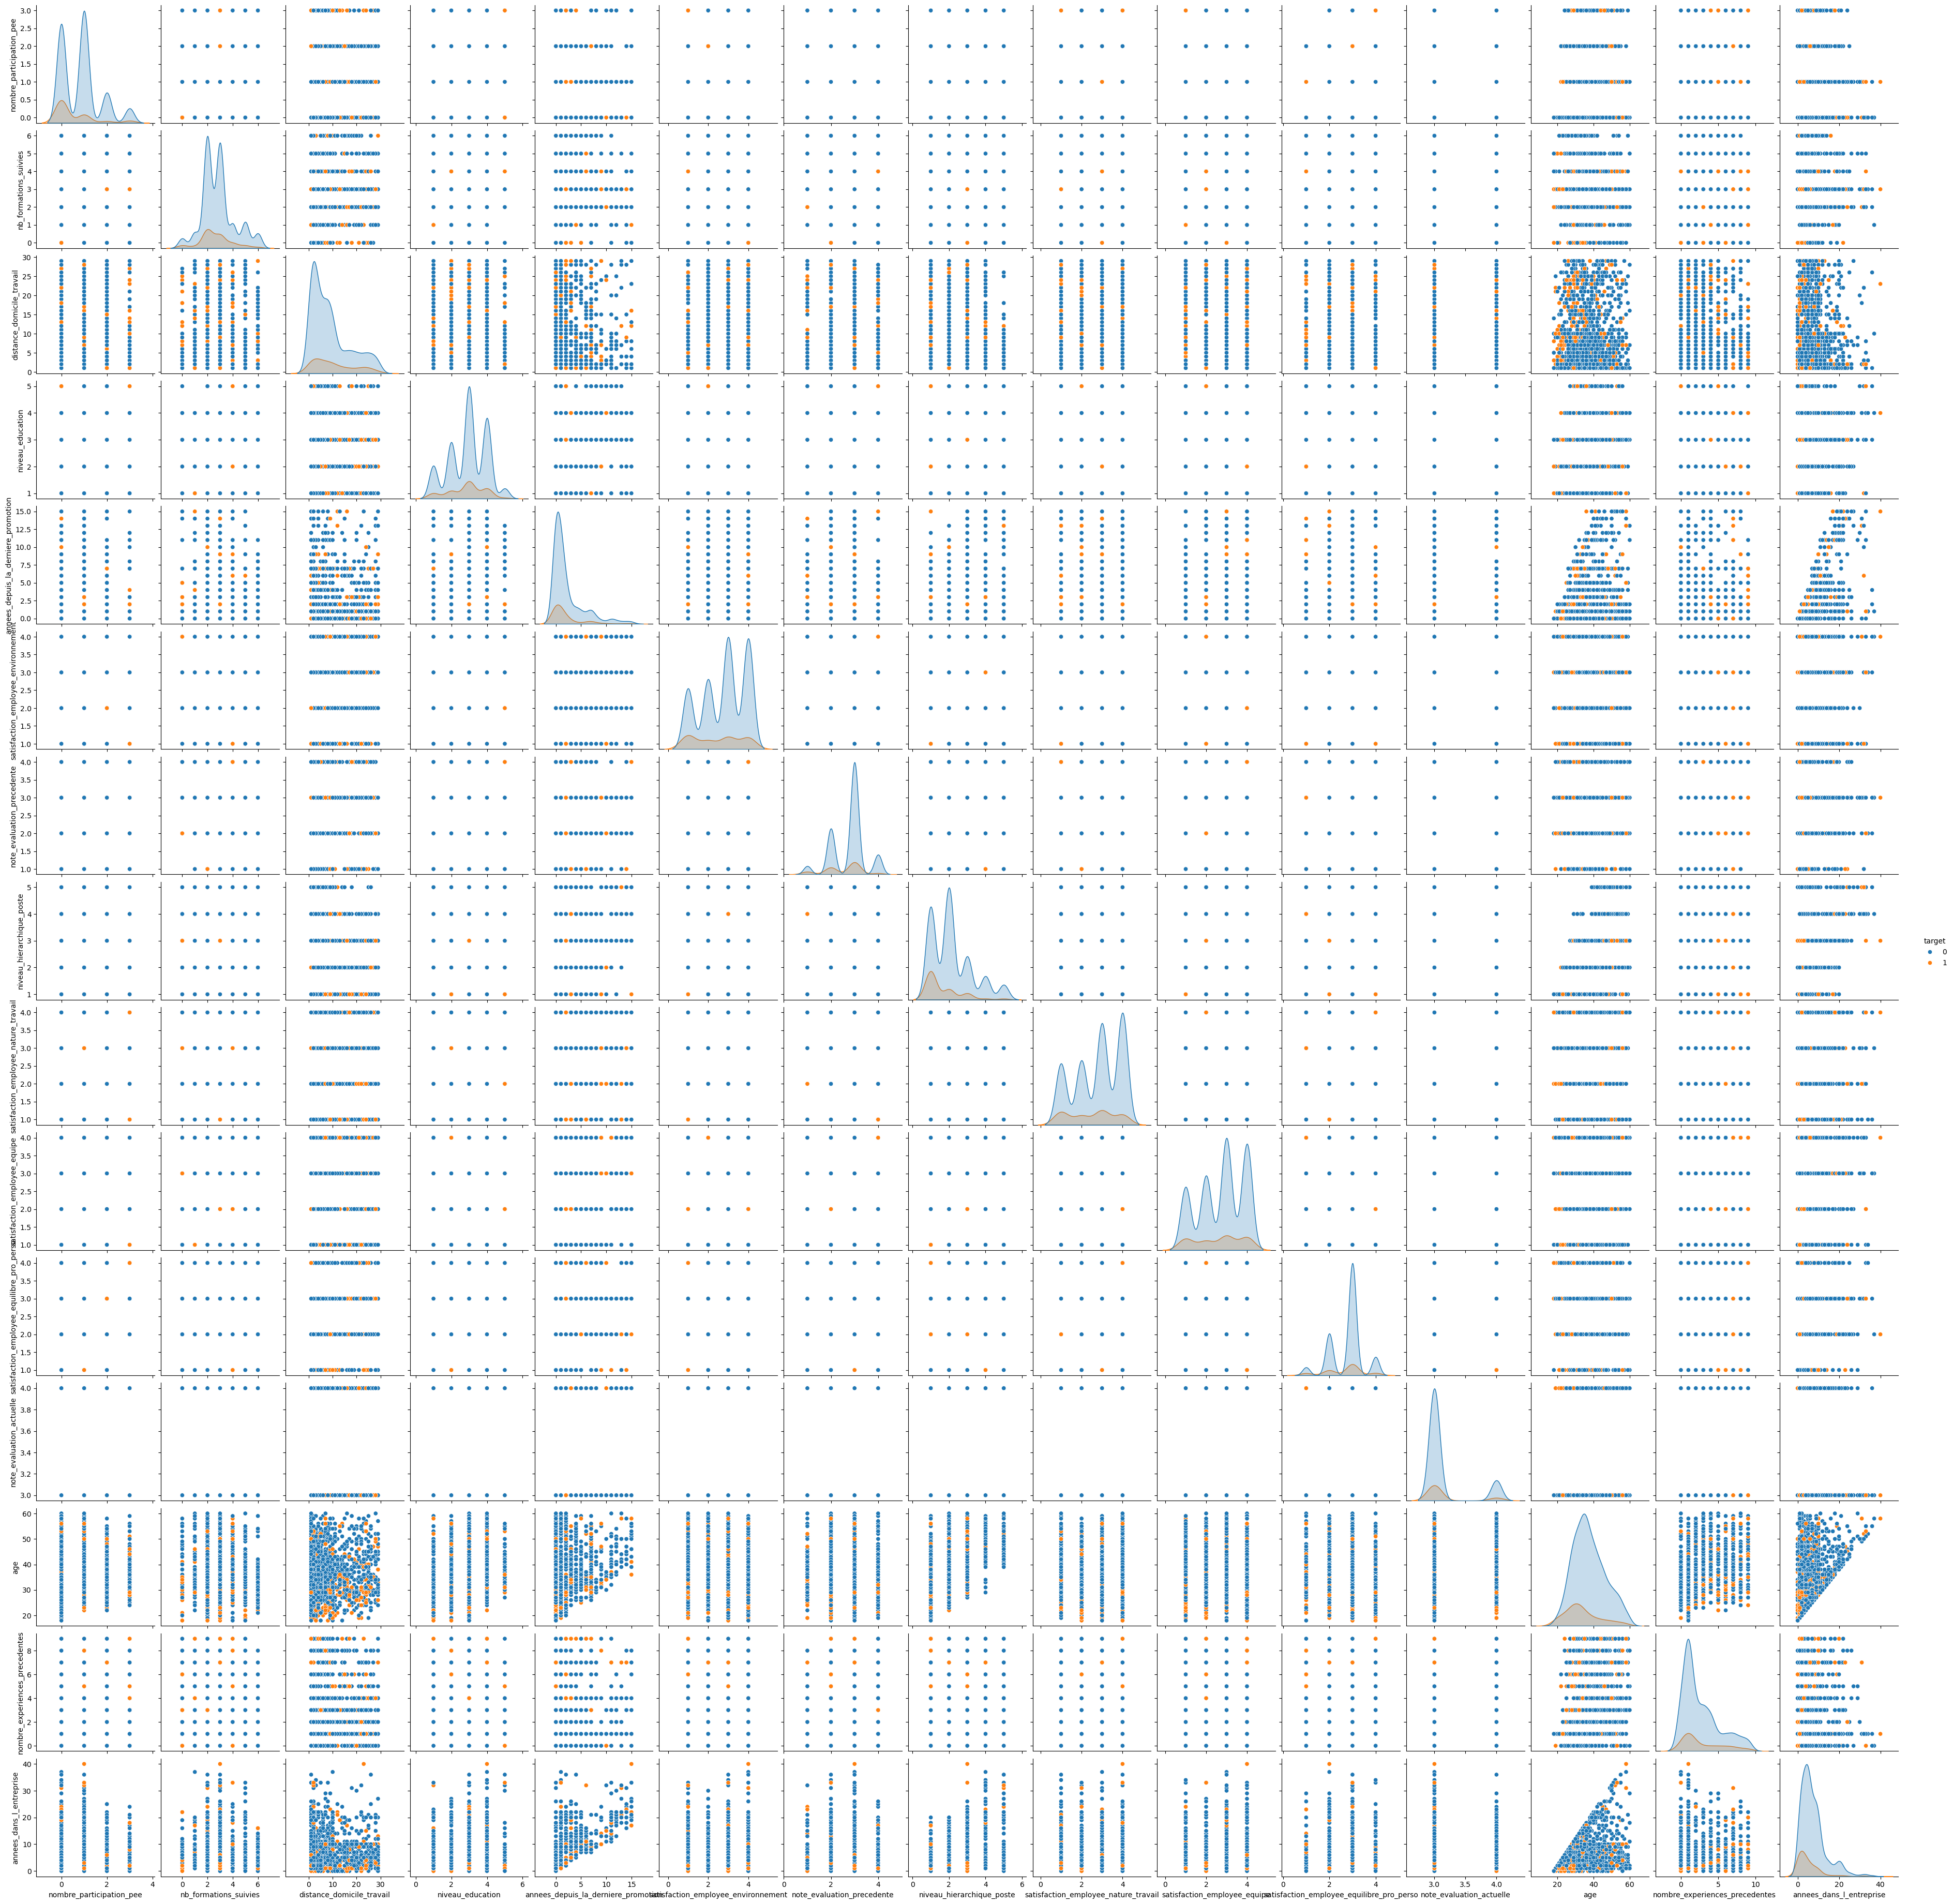

In [90]:
# Visualisons nos Variables numérique dans un pairplot coloront en fonction de notre cible
sns.pairplot(final_df[num_vars], hue = 'target', palette=sns.color_palette('tab10', n_colors=2))
plt.show()

* Nous observons qu'il est très diffiche a ce niveau de distinguer visuellement un employé parti ou resté.

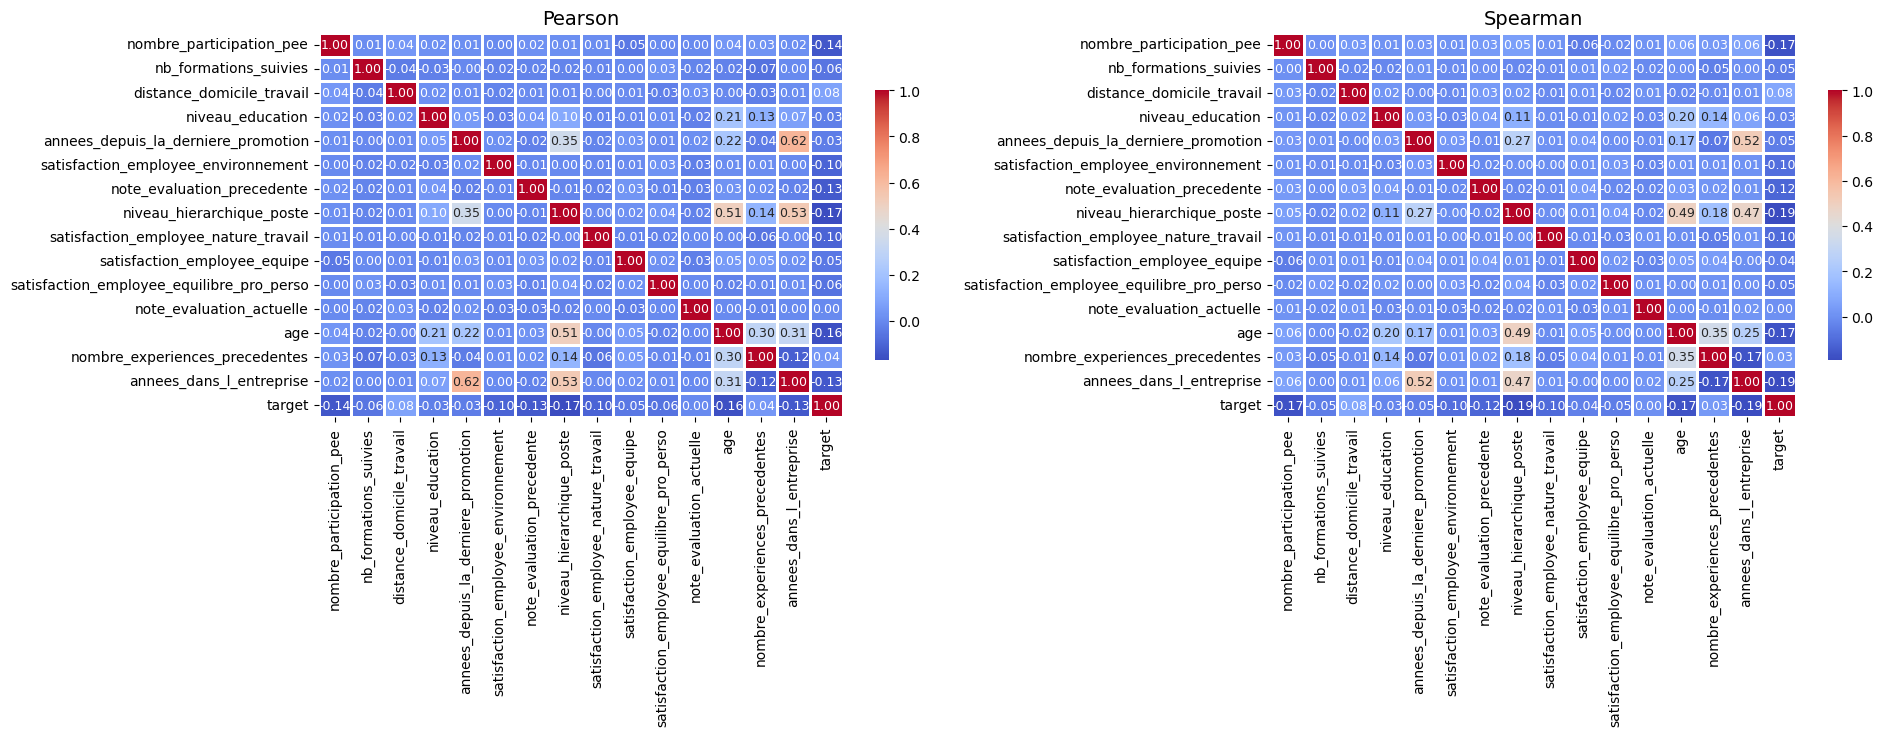

In [96]:
# On calcule la matrice de corrélation
corr_pearson = fusion_df[num_vars].corr(method='pearson') # Matrice de corrélation de Pearson
corr_spearman = fusion_df[num_vars].corr(method='spearman') # Matrice de corrélation de Spearman

# On agrandit la figure et on augmente l'espace entre les colonnes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Heatmap Pearson
sns.heatmap(
    corr_pearson,
    ax=axes[0],
    annot=True,
    fmt='.2f',
    linewidths=1,
    cmap='coolwarm',
    cbar_kws={'shrink': 0.7},
    annot_kws={"size": 9}  # Taille du texte dans les cases
)
axes[0].set_title("Pearson", fontsize=14)

# Heatmap Spearman
sns.heatmap(
    corr_spearman,
    ax=axes[1],
    annot=True,
    fmt='.2f',
    linewidths=1,
    cmap='coolwarm',
    cbar_kws={'shrink': 0.7},
    annot_kws={"size": 9}
)
axes[1].set_title("Spearman", fontsize=14)

plt.tight_layout(pad=3)  # pad = nous metton des espace entre les sous-graphiques
plt.show()

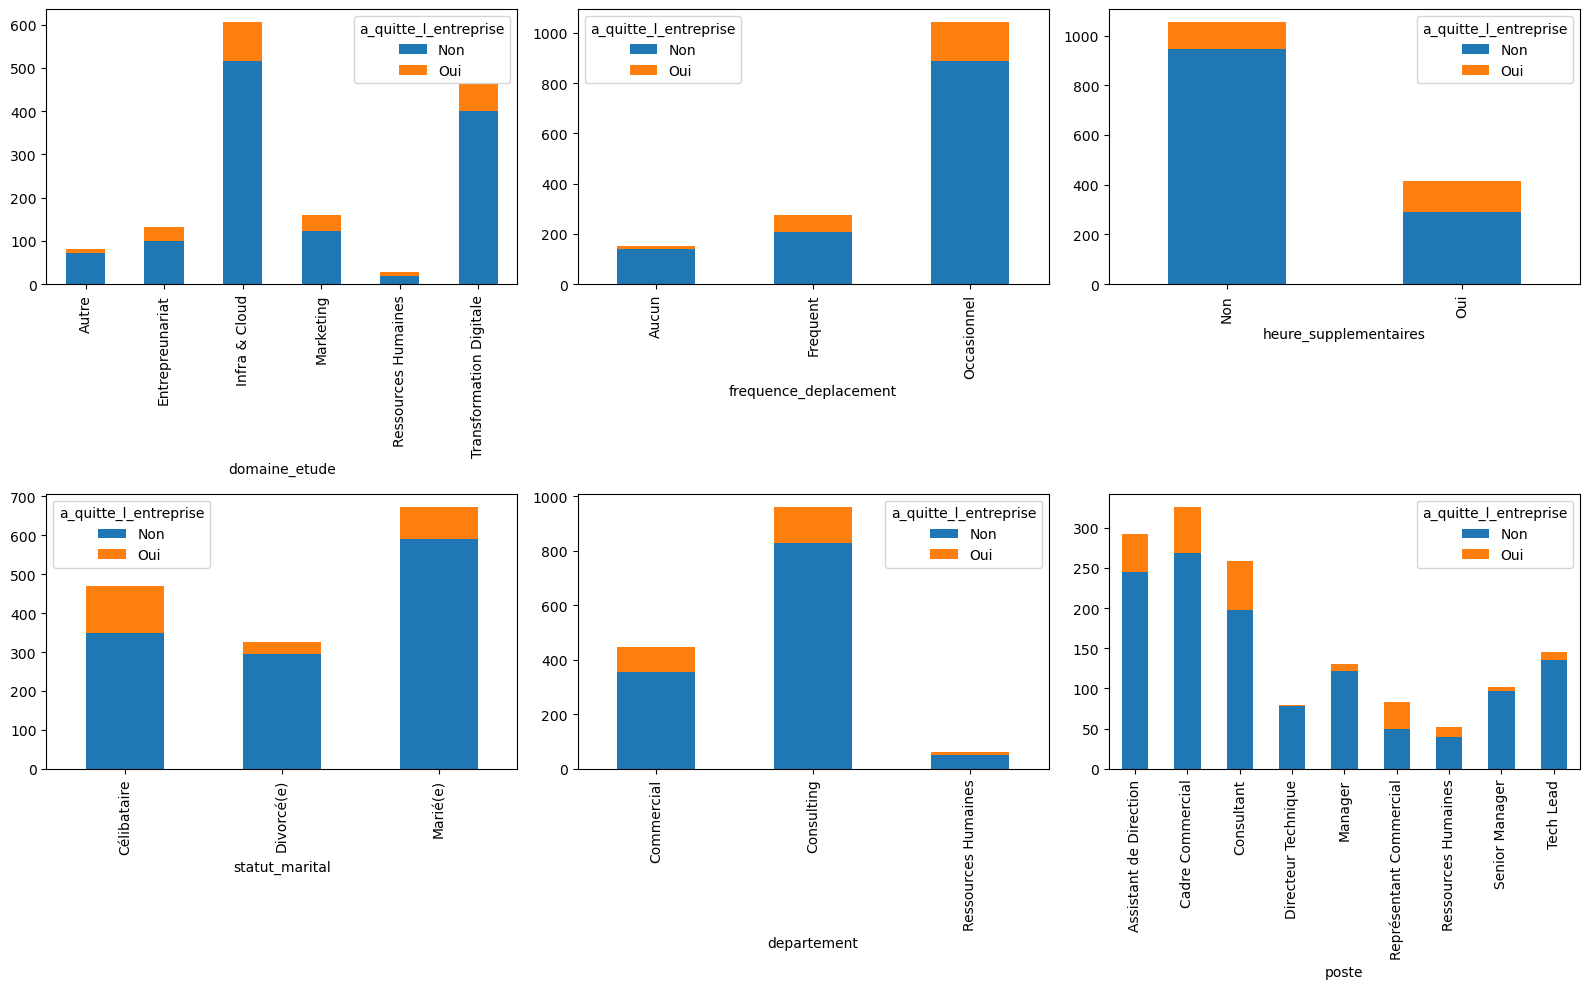

In [98]:
# Variables catégorielles vs. cible 
n_cols = 3
n_rows = (len(cat_vars) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(cat_vars):
    pd.crosstab(final_df[col], final_df["a_quitte_l_entreprise"]).plot(kind="bar", stacked=True, ax=axes[i]) # supperposons les bar avec stacked
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

* D'après l'observation nos variables catégorielle seront probablement très importantes dans nos différents models.
    - beaucoup de différence en moyenne en ceux qui sont partis et ceux restés (sauf pour quelques catégories comme : Directeur techniques, Senior Manager, Resssources Humaine...)
____
* **REMARQUE :** Chaque poste appartient quasiment toujours à un seul département

In [163]:
# Faisons une étude pour voir la relation entre le poste, le derpartement mais aussi le domaine_etude ( mieux entre toutes nos catégories)
cat_vars.append('a_quitte_l_entreprise')

# Bouclons sur toutes les combinaisons possibles de 2 variables avec la librairie itertools
for var1, var2 in itertools.combinations(cat_vars, 2):
        table = pd.crosstab(fusion_df[var1], fusion_df[var2])
        chi2, p, dof, _ = chi2_contingency(table)
        print(f"{var1} vs {var2}")
        print(f"Chi2 = {chi2:.2f}, ddl = {dof}, p-value = {p:.6f}")
        if p < 0.05:
            print("Forte dépendance entre les deux")
        else:
            print("Variables indépendantes (pas de redondance évidente)")
        print("-" * 60)

domaine_etude vs frequence_deplacement
Chi2 = 5.17, ddl = 10, p-value = 0.879649
Variables indépendantes (pas de redondance évidente)
------------------------------------------------------------
domaine_etude vs heure_supplementaires
Chi2 = 1.76, ddl = 5, p-value = 0.881482
Variables indépendantes (pas de redondance évidente)
------------------------------------------------------------
domaine_etude vs statut_marital
Chi2 = 9.59, ddl = 10, p-value = 0.477613
Variables indépendantes (pas de redondance évidente)
------------------------------------------------------------
domaine_etude vs departement
Chi2 = 1024.98, ddl = 10, p-value = 0.000000
Forte dépendance entre les deux
------------------------------------------------------------
domaine_etude vs poste
Chi2 = 864.76, ddl = 40, p-value = 0.000000
Forte dépendance entre les deux
------------------------------------------------------------
domaine_etude vs a_quitte_l_entreprise
Chi2 = 16.02, ddl = 5, p-value = 0.006774
Forte dépendanc

* Toutes nos variables sont statistiquement liées à la cible. Cela signifie qu'elles peuvent contribuer à prédire si une personne quitte l'entreprise ou non.
* Certaines variables sont fortement dépendantes entre elles :
    - poste et departement -> très fortement liés
    - poste et domaine_etude -> également liés
    - departement et domaine_etude -> également liés
    - statut_marital et poste
        - nous rémarquons que poste est très liés a plusieur variable dont c'est prudent de la supprimer. je supprimme aussi domaine_etude

In [166]:
final_df.to_csv('../fichiers/donnéesDeFusion.csv', index=False)